In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import string


In [2]:
csv_file_path = './airbnb_dataset/data.csv'
df = pd.read_csv(csv_file_path)
df.head()

,id,log_price,accommodates,bathrooms,description,host_response_rate,name,bedrooms,beds,property_type_Apartment,...,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t
0,6901257,5.010635,3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",100.0,Beautiful brownstone 1-bedroom,1.0,1.0,1,...,0,0,0,0,1,0,0,1,0,1
1,6304928,5.129899,7.0,1.0,Enjoy travelling during your stay in Manhattan...,100.0,Superb 3BR Apt Located Near Times Square,3.0,3.0,1,...,0,0,0,0,1,0,0,1,0,1
2,7919400,4.976734,5.0,1.0,The Oasis comes complete with a full backyard ...,100.0,The Garden Oasis,1.0,3.0,1,...,0,0,0,0,1,0,0,1,0,1
3,13418779,6.620073,4.0,1.0,This light-filled home-away-from-home is super...,100.0,Beautiful Flat in the Heart of SF!,2.0,2.0,0,...,0,0,0,0,0,1,0,1,0,1
4,3808709,4.744932,2.0,1.0,"Cool, cozy, and comfortable studio located in ...",100.0,Great studio in midtown DC,0.0,1.0,1,...,0,0,1,0,0,0,0,1,0,1


In [3]:
# Load sentiment_dict from a created file
sentiment_dict = {}
with open('airbnb_dataset/tfidf_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        sentiment_dict[word] = float(theta)

In [4]:
name_dict = {}
with open('airbnb_dataset/name_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        name_dict[word] = float(theta)

In [5]:
punctuation = set(string.punctuation)

def sentiment(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += sentiment_dict.get(w, 0)
    return sentimentScore

In [6]:
def name(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += name_dict.get(w, 0)
    return sentimentScore

In [7]:
# Calculate each description's sentiment score
def des_sentiment(row):
    # This function will be applied to each row in the DataFrame
    if pd.notnull(row['description']):
        return sentiment(row['description'])
    else:
        return 0

def name_sentiment(row):
    if pd.notnull(row['description']):
        return name(row['description'])
    else:
        return 0
    
# Apply the function to each row
df['des_sentiment_analysis'] = df.apply(des_sentiment, axis=1)
df['name_sentiment_analysis'] = df.apply(name_sentiment, axis=1)


In [8]:
# Min-Max Nomarlization
cols_to_normalize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate'
]

df[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].min()) / (df[cols_to_normalize].max() - df[cols_to_normalize].min())


df.shape, df[cols_to_normalize].head()

((73923, 69),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis  \
 0      0.133333      0.125       0.1  0.055556                0.546844   
 1      0.400000      0.125       0.3  0.166667                0.602953   
 2      0.266667      0.125       0.1  0.166667                0.600378   
 3      0.200000      0.125       0.2  0.111111                0.546608   
 4      0.066667      0.125       0.0  0.055556                0.518090   
 
    host_response_rate  
 0                 1.0  
 1                 1.0  
 2                 1.0  
 3                 1.0  
 4                 1.0  )

In [9]:

#pip install scikit-learn


In [10]:
# Standardlization 
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate'
]

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.shape, df[columns_to_standardize].head()

((73923, 69),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis  \
 0     -0.072621  -0.404046 -0.312048 -0.566461                0.216242   
 1      1.783653  -0.404046  2.034955  1.027816                0.837002   
 2      0.855516  -0.404046 -0.312048  1.027816                0.808508   
 3      0.391448  -0.404046  0.861454  0.230678                0.213627   
 4     -0.536689  -0.404046 -1.485549 -0.566461               -0.101872   
 
    host_response_rate  
 0            0.296013  
 1            0.296013  
 2            0.296013  
 3            0.296013  
 4            0.296013  )

In [11]:
df.drop(['description'], axis=1, inplace=True)

In [12]:
df.head()

,id,log_price,accommodates,bathrooms,host_response_rate,name,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,...,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t,des_sentiment_analysis,name_sentiment_analysis
0,6901257,5.010635,-0.072621,-0.404046,0.296013,Beautiful brownstone 1-bedroom,-0.312048,-0.566461,1,0,...,0,0,1,0,0,1,0,1,0.216242,-0.435248
1,6304928,5.129899,1.783653,-0.404046,0.296013,Superb 3BR Apt Located Near Times Square,2.034955,1.027816,1,0,...,0,0,1,0,0,1,0,1,0.837002,-1.788095
2,7919400,4.976734,0.855516,-0.404046,0.296013,The Garden Oasis,-0.312048,1.027816,1,0,...,0,0,1,0,0,1,0,1,0.808508,-0.133695
3,13418779,6.620073,0.391448,-0.404046,0.296013,Beautiful Flat in the Heart of SF!,0.861454,0.230678,0,0,...,0,0,0,1,0,1,0,1,0.213627,-0.926212
4,3808709,4.744932,-0.536689,-0.404046,0.296013,Great studio in midtown DC,-1.485549,-0.566461,1,0,...,1,0,0,0,0,1,0,1,-0.101872,-0.095776


Linear Regression Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [14]:
X = df.drop(['log_price', 'id', 'name'], axis=1)  
y = df['log_price']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
yhat_test=lr.predict(X_test)
mse = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 205325989648114.16


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


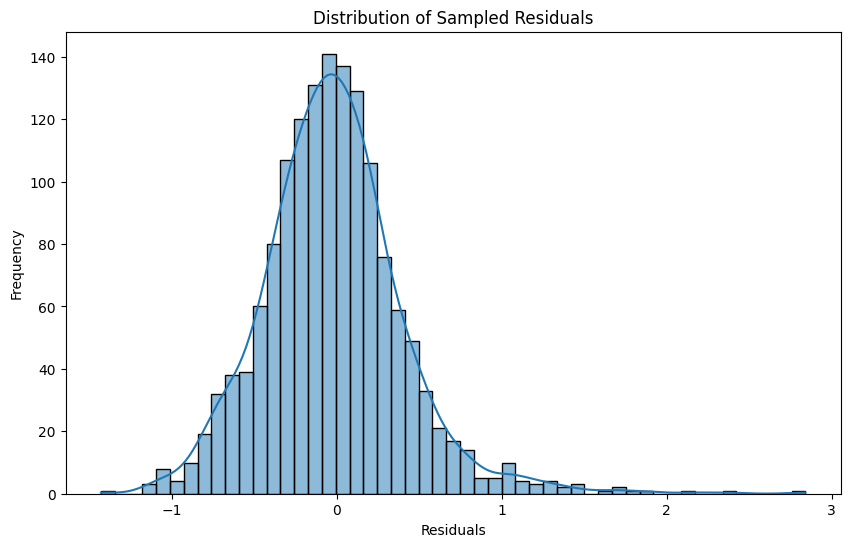

In [18]:
residuals = y_test-yhat_test
# Sample a fraction of the residuals because the size of residuals is too large
residuals_sample = residuals.sample(frac=0.1,random_state = 40 )  # Adjust frac as needed

plt.figure(figsize=(10, 6))
sns.histplot(residuals_sample, kde=True)
plt.title('Distribution of Sampled Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


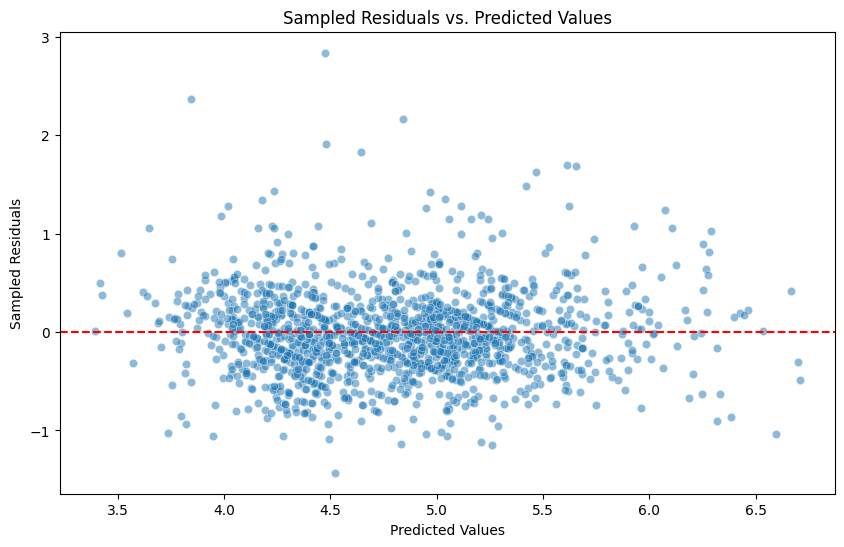

In [19]:
df_plot = pd.DataFrame({'Predicted': yhat_test, 'Residuals': residuals})
df_sample = df_plot.sample(frac=0.1,random_state=40)  

# Plotting the sampled residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=df_sample, alpha=0.5)
plt.title('Sampled Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Sampled Residuals')
plt.axhline(y=0, color='red', linestyle='--') 
plt.show()


2nd Polynomial Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

In [21]:
X = df.drop('log_price', axis=1)  
y = df['log_price']  

In [22]:
features = [col for col in df.columns if col != 'log_price' and df[col].dtype in ['int64', 'float64']]
X = df[features]

In [23]:
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
yhat_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 score: {r2}')

MSE: 31.317397170837264
R2 score: -58.441520049713


3rd Polynomial Regression model

In [26]:
degree = 3  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 score: {r2}')